### Initial setup

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import missingno as msno

print("Packages uploaded successfully!")

Packages uploaded successfully!


In [2]:
#Read dataset
data = pd.read_csv('./machine_readable.csv')

In [3]:
#Check first five rows
data.head(5)

,Chemical,CASRN,DNT,SLogP,BBB,Cbrain/Cblood,Pgp_inhibition,Pgp_substrate,Pgp_active,"BDNF, Reduction",Activity_Syn,Syn_EC30,Viability_EC30,Activity_NNF,NNF EC50min,NNF EC50max,Viability_LDH
0,5-Fluorouracil,51-21-8,1,-0.7977,1.0,0.199528,0.0,0.0,0.0,1.0,1.0,0.0,91.8,1.0,0.46,5.03,3.37
1,Acetaminophen,103-90-2,0,1.3506,1.0,0.613827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,Acrylamide,79-06-1,1,-0.3423,1.0,0.380063,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.26,11.30,0.00
3,Aldicarb,116-06-3,1,1.4698,1.0,0.609681,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.66,9.88,0.00
4,Aminonicotinamide,329-89-5,1,-0.2373,1.0,0.212859,0.0,0.0,0.0,NaN,1.0,7.9,6.7,1.0,3.18,9.85,6.27


In [4]:
#Statistical summary
data.describe()

,DNT,SLogP,BBB,Cbrain/Cblood,Pgp_inhibition,Pgp_substrate,Pgp_active,"BDNF, Reduction",Activity_Syn,Syn_EC30,Viability_EC30,Activity_NNF,NNF EC50min,NNF EC50max,Viability_LDH
count,97.000000,86.000000,83.000000,82.000000,86.000000,86.00000,86.000000,37.000000,67.000000,67.000000,67.000000,86.000000,86.000000,86.000000,80.000000
mean,0.752577,2.234059,0.855422,2.072492,0.162791,0.05814,0.174419,0.594595,0.522388,6.077761,7.157015,0.744186,4.154419,33.273721,40.660125
std,0.433756,2.725789,0.353813,3.713260,0.371340,0.23538,0.381695,0.497743,0.503268,11.874245,17.468629,0.438877,20.399918,214.138809,329.954810
min,0.000000,-4.989400,0.000000,0.008951,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.481343,1.000000,0.346411,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.002500,0.007500,0.000000
50%,1.000000,2.027390,1.000000,0.785416,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.105000,6.510000,0.000000
75%,1.000000,4.474225,1.000000,1.604882,0.000000,0.00000,0.000000,1.000000,1.000000,7.100000,5.850000,1.000000,1.307500,21.907500,2.047500
max,1.000000,6.989300,1.000000,23.155500,1.000000,1.00000,1.000000,1.000000,1.000000,51.900000,95.000000,1.000000,186.850000,1993.650000,2954.160000


### Distribution of categorical variables

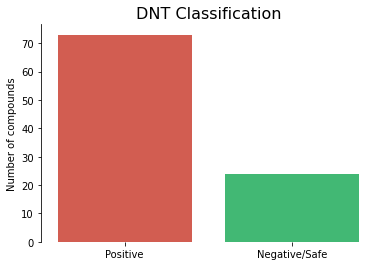

In [5]:
#DNT
replace_values = {0 : 'Negative/Safe', 1 : 'Positive'}
dnt = data.replace({"DNT": replace_values})
#sns.set_palette("Set3") #or pastel
#sns.set_palette("Reds")
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="DNT", data=dnt)
ax.set_title('DNT Classification', fontsize=16)
ax.set(ylabel='Number of compounds', xlabel=None)
sns.despine(right=True, bottom = True);

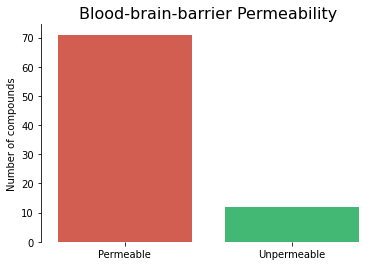

In [6]:
#BBB
replace_values_bbb = {0 : 'Unpermeable', 1 : 'Permeable'}
bbb = data.replace({"BBB": replace_values_bbb})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="BBB", data=bbb)
ax.set(ylabel='Number of compounds', xlabel=None)
ax.set_title('Blood-brain-barrier Permeability', fontsize=16)
sns.despine(right=True, bottom = True)

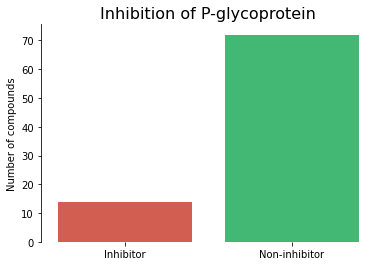

In [7]:
#Pgp_inhibition
replace_values_pgp_inh = {1 : 'Inhibitor', 0 : 'Non-inhibitor'}
pgp_inh = data.replace({"Pgp_inhibition": replace_values_pgp_inh})
my_palette = ["#e74c3c", "#2ecc71" ]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Pgp_inhibition", data=pgp_inh, order = ["Inhibitor", "Non-inhibitor"])
ax.set(ylabel='Number of compounds', xlabel=None)
ax.set_title('Inhibition of P-glycoprotein', fontsize=16)
sns.despine(right=True, bottom = True)

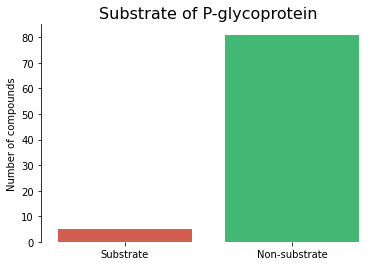

In [4]:
#Pgp_substrate
replace_values_pgp_subs = {0 : 'Non-substrate', 1 : 'Substrate'}
pgp_subs = data.replace({"Pgp_substrate": replace_values_pgp_subs})
my_palette = ["#e74c3c","#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Pgp_substrate", data=pgp_subs, order = ["Substrate", "Non-substrate"])
ax.set(ylabel='Number of compounds', xlabel=None)
ax.set_title('Substrate of P-glycoprotein', fontsize=16)
sns.despine(right=True, bottom = True)

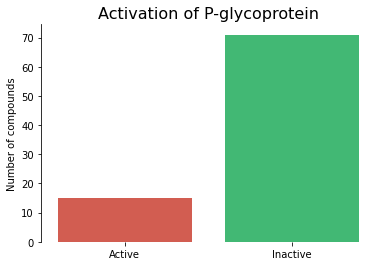

In [5]:
#Pgp_active
replace_values_pgp_act = {0 : 'Inactive', 1 : 'Active'}
pgp_act = data.replace({"Pgp_active": replace_values_pgp_act})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Pgp_active", data=pgp_act, order = ["Active", "Inactive"])
ax.set(ylabel='Number of compounds', xlabel=None)
ax.set_title('Activation of P-glycoprotein', fontsize=16)
sns.despine(right=True, bottom = True)

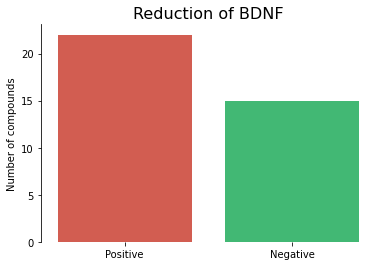

In [10]:
#BDNF, Reduction
replace_values_bdnf = {0 : 'Negative', 1 : 'Positive'}
bdnf = data.replace({"BDNF, Reduction": replace_values_bdnf})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="BDNF, Reduction", data=bdnf)
ax.set(ylabel='Number of compounds', xlabel=None)
ax.set_title('Reduction of BDNF', fontsize=16)
sns.despine(right=True, bottom = True)

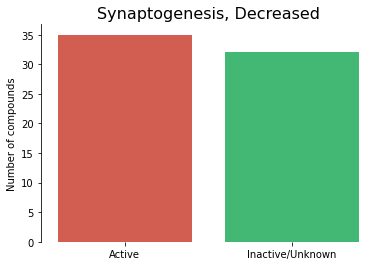

In [11]:
#Activity_Syn
replace_values_syn = {0 : 'Inactive/Unknown', 1: 'Active'}
syn = data.replace({"Activity_Syn": replace_values_syn})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Activity_Syn", data=syn, order=[ "Active", "Inactive/Unknown"] )
ax.set(ylabel='Number of compounds', xlabel=None)
ax.set_title('Synaptogenesis, Decreased', fontsize=16)
sns.despine(right=True, bottom = True)

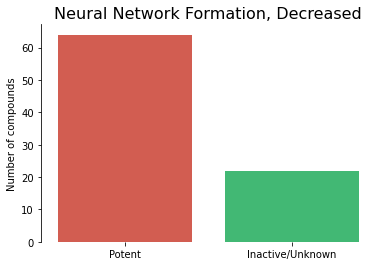

In [12]:
#Activity_NNF
replace_values_nnf = {0 : 'Inactive/Unknown', 1 : 'Potent'}
nnf = data.replace({"Activity_NNF": replace_values_nnf})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.countplot(x="Activity_NNF", data=nnf, order = ["Potent", "Inactive/Unknown"])
ax.set(ylabel='Number of compounds', xlabel=None)
ax.set_title('Neural Network Formation, Decreased', fontsize=16)
sns.despine(right=True, bottom = True)

### Distribution of continuous variables

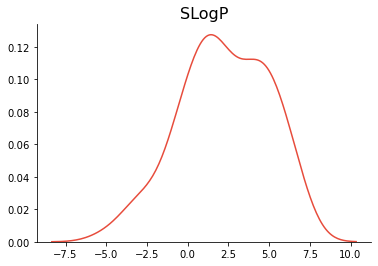

In [13]:
#SLogP
ax = sns.kdeplot(data['SLogP'], legend = False)
ax.set(xlabel = None, ylabel = None)
ax.set_title('SLogP', fontsize=16)
sns.despine(right=True, bottom = False)

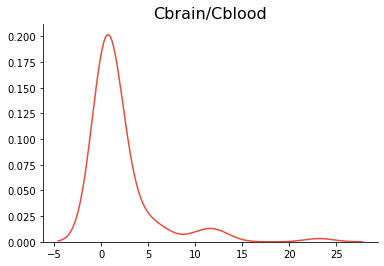

In [14]:
#Cbrain/Cblood
ax = sns.kdeplot(data['Cbrain/Cblood'], legend=False)
ax.set(xlabel = None, ylabel = None)
ax.set_title('Cbrain/Cblood', fontsize=16)
sns.despine(right=True)

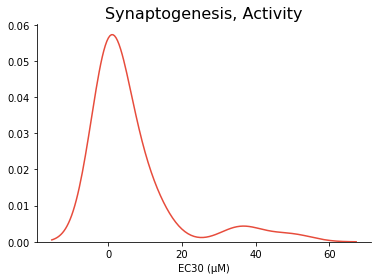

In [15]:
#Syn_EC30
ax = sns.kdeplot(data['Syn_EC30'], legend=False)
ax.set(ylabel = None, xlabel = 'EC30 (μM)')
ax.set_title('Synaptogenesis, Activity', fontsize=16)
sns.despine(right=True)

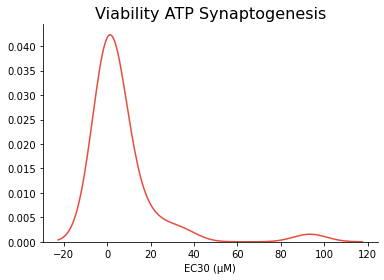

In [16]:
#Viability_EC30
ax = sns.kdeplot(data['Viability_EC30'], legend=False)
ax.set(ylabel = None, xlabel = 'EC30 (μM)')
ax.set_title('Viability ATP Synaptogenesis', fontsize=16)
sns.despine(right=True)

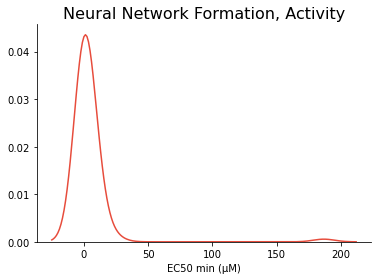

In [17]:
#NNF EC50min
ax = sns.kdeplot(data['NNF EC50min'], legend=False)
ax.set(ylabel = None, xlabel = 'EC50 min (μM)')
ax.set_title('Neural Network Formation, Activity', fontsize=16)
sns.despine(right=True)

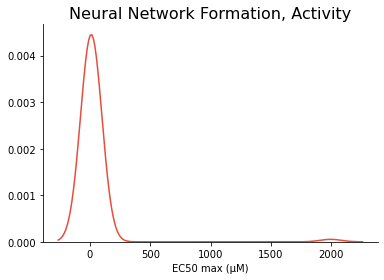

In [18]:
#NNF EC50max
ax = sns.kdeplot(data['NNF EC50max'], legend=False)
ax.set(ylabel = None, xlabel = 'EC50 max (μM)')
ax.set_title('Neural Network Formation, Activity', fontsize=16)
sns.despine(right=True)

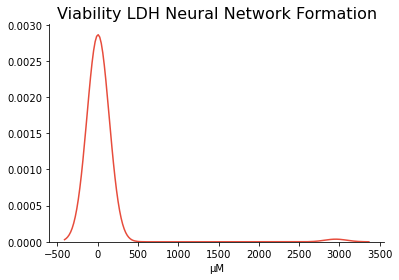

In [19]:
#Viability_LDH
ax = sns.kdeplot(data['Viability_LDH'], legend=False)
ax.set(ylabel = None, xlabel = 'μM')
ax.set_title('Viability LDH Neural Network Formation', fontsize=16)
sns.despine(right=True)

### Correlations

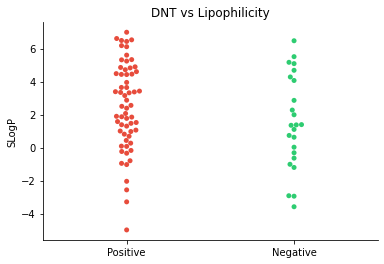

In [20]:
# DNT vs SLogP
replace_values_dnt_slogp = {0 : 'Negative', 1 : 'Positive'}
dnt_slogp = data.replace({"DNT": replace_values_dnt_slogp})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.swarmplot(x=dnt_slogp["DNT"], y=dnt_slogp["SLogP"], data=dnt_slogp)
ax.set(ylabel='SLogP', xlabel=None, title ='DNT vs Lipophilicity')
sns.despine(right=True, bottom = False)

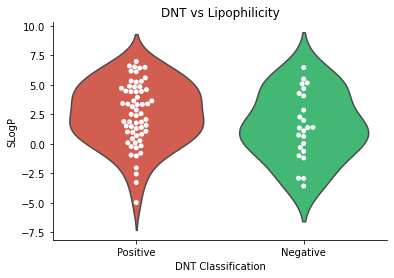

In [21]:
ax = sns.violinplot(x=dnt_slogp["DNT"], y=dnt_slogp["SLogP"], data=dnt_slogp, inner=None)
ax = sns.swarmplot(x=dnt_slogp["DNT"], y=dnt_slogp["SLogP"], data=dnt_slogp,
                   color="white", edgecolor="gray")
ax.set(ylabel='SLogP', xlabel='DNT Classification', title ='DNT vs Lipophilicity')
sns.despine(right=True, bottom = False)

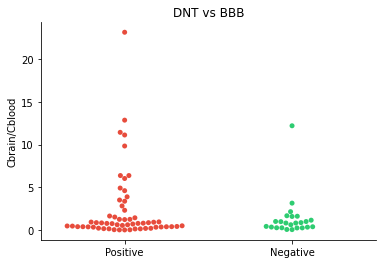

In [22]:
# DNT vs Cbrain/Cblood
replace_values_dnt_bbb = {0 : 'Negative', 1 : 'Positive'}
dnt_bbb = data.replace({"DNT": replace_values_dnt_bbb})
my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))
ax = sns.swarmplot(x=dnt_bbb["DNT"], y=dnt_bbb["Cbrain/Cblood"], data=dnt_bbb)
ax.set(ylabel='Cbrain/Cblood', xlabel=None, title ='DNT vs BBB')
sns.despine(right=True, bottom = False)

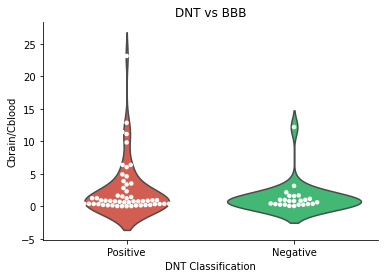

In [23]:
ax = sns.violinplot(x=dnt_bbb["DNT"], y=dnt_bbb["Cbrain/Cblood"], data=dnt_bbb, inner=None)
ax = sns.swarmplot(x=dnt_bbb["DNT"], y=dnt_bbb["Cbrain/Cblood"], data=dnt_bbb,
                   color="white", edgecolor="gray", s=4.5)
ax.set(ylabel='Cbrain/Cblood', xlabel='DNT Classification', title ='DNT vs BBB')
sns.despine(right=True, bottom = False)

### Missing values

In [4]:
#Table with percentage
data_new = data.drop(columns=['Chemical', 'CASRN'])
missing = (data_new.isnull().sum(0)/97)*100
df = round(missing)
df

DNT                 0.0
SLogP              11.0
BBB                14.0
Cbrain/Cblood      15.0
Pgp_inhibition     11.0
Pgp_substrate      11.0
Pgp_active         11.0
BDNF, Reduction    62.0
Activity_Syn       31.0
Syn_EC30           31.0
Viability_EC30     31.0
Activity_NNF       11.0
NNF EC50min        11.0
NNF EC50max        11.0
Viability_LDH      18.0
dtype: float64

In [6]:
len(df)

15

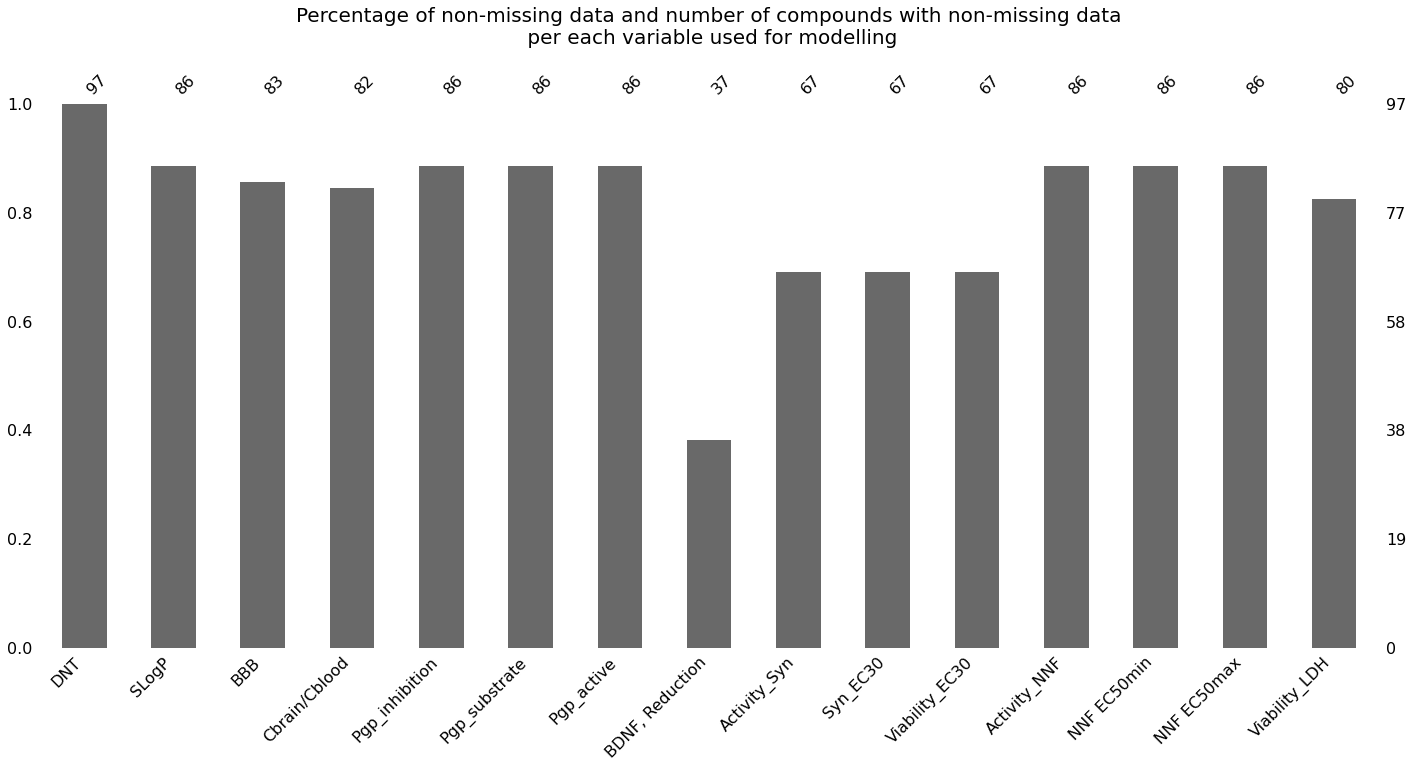

In [17]:
ax = msno.bar(data_new);
#ax.set(ylabel = 'Percentage non-missing data', xlabel = 'Variables');
ax.set_title('Percentage of non-missing data and number of compounds with non-missing data\n per each variable used for modelling\n', fontsize=20);

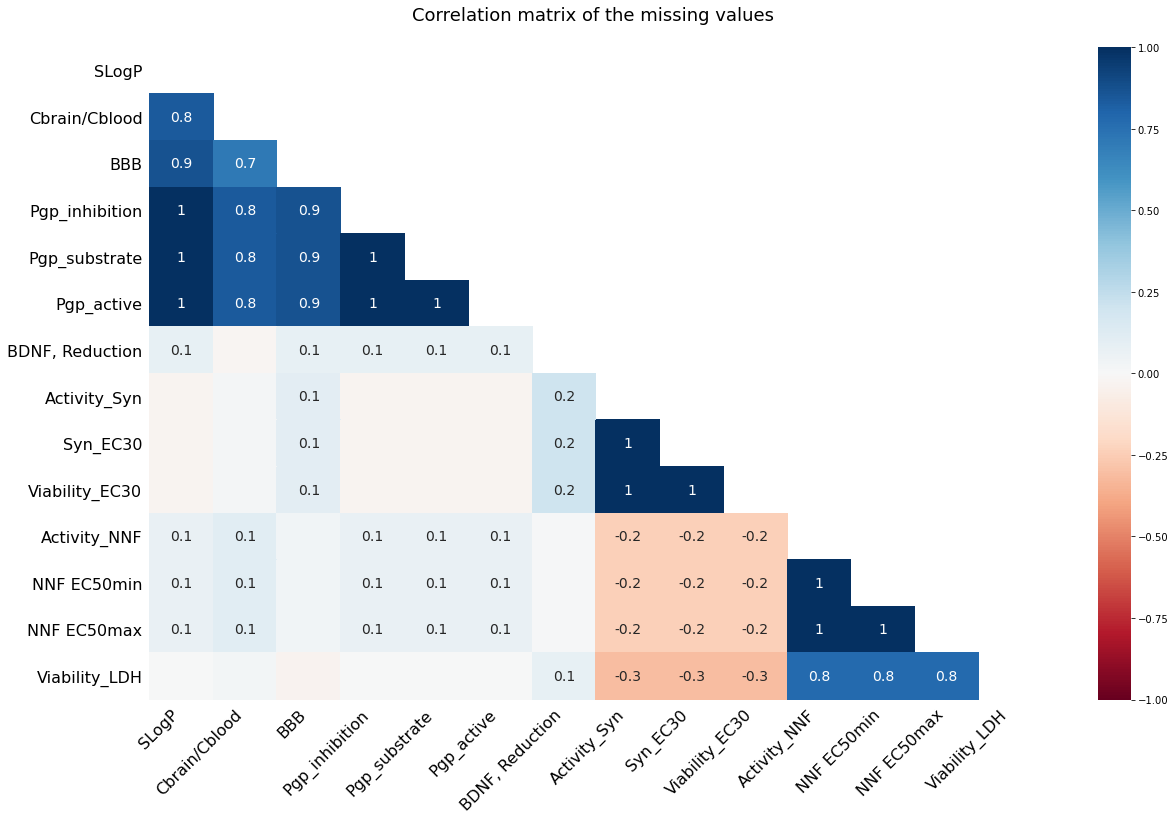

In [33]:
#Correlation heatmap 
#It measures nullity correlation
#How strongly the presence or absence of one variable affects the presence of another
msno.heatmap(data)
plt.title("Correlation matrix of the missing values \n", fontsize = 18);

### Pairwise relationships

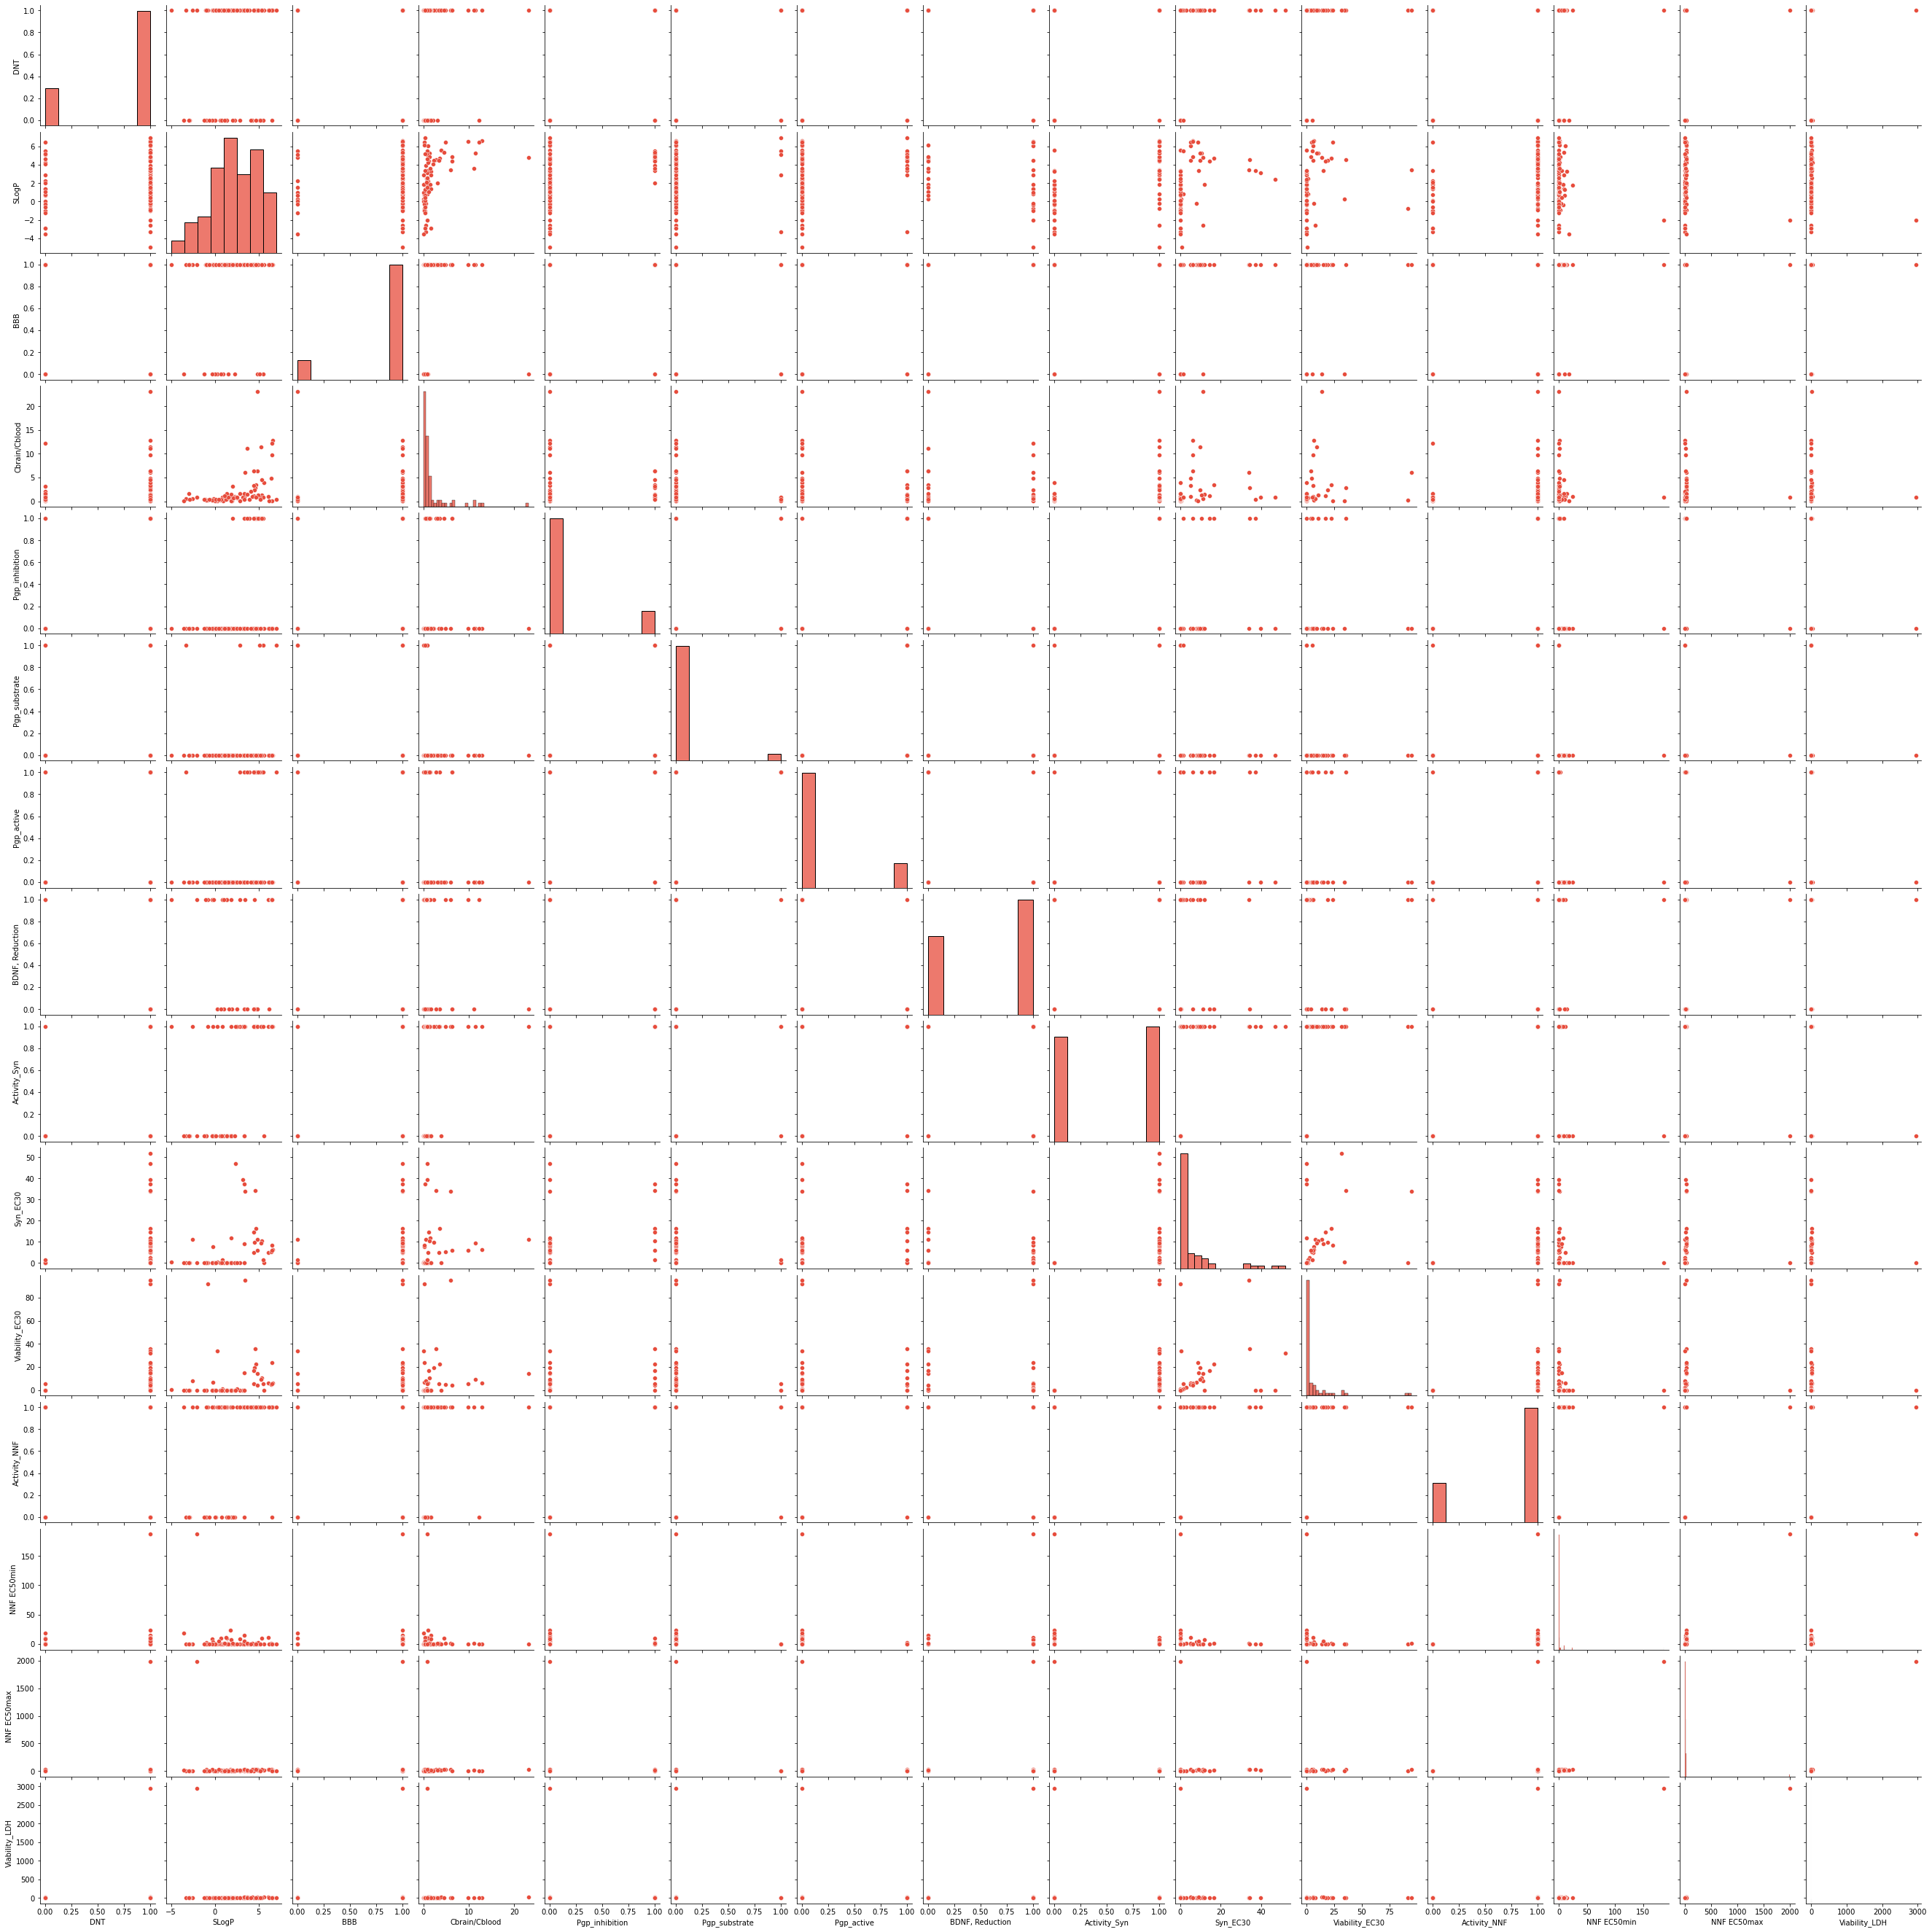

In [27]:
sns.pairplot(data);

### Correlation matrix

In [28]:
#Standardise continuous values
data_prep = data[['SLogP', 'Cbrain/Cblood','Syn_EC30', 
                  'Viability_EC30', 'NNF EC50min', 'NNF EC50max', 'Viability_LDH']]
sc = StandardScaler()
data_scaled = sc.fit_transform(data_prep)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = ['SLogP', 'Cbrain/Cblood','Syn_EC30', 
                       'Viability_EC30', 'NNF EC50min', 'NNF EC50max', 'Viability_LDH']

#Add other discrete values and details
discrete = data [['Chemical', 'CASRN', 'DNT', 'BBB', 'Pgp_inhibition', 'Pgp_substrate', 'Pgp_active', 
  'BDNF, Reduction', 'Activity_Syn', 'Activity_NNF']]
data = discrete.join(data_scaled, lsuffix="_left", rsuffix="_right")
data = data[['DNT', 'SLogP', 'Cbrain/Cblood', 'BBB', 'Pgp_inhibition', 'Pgp_substrate', 'Pgp_active', 'BDNF, Reduction', 'Activity_Syn', 'Syn_EC30', 
                       'Viability_EC30', 'Activity_NNF', 'NNF EC50min', 'NNF EC50max', 'Viability_LDH']]

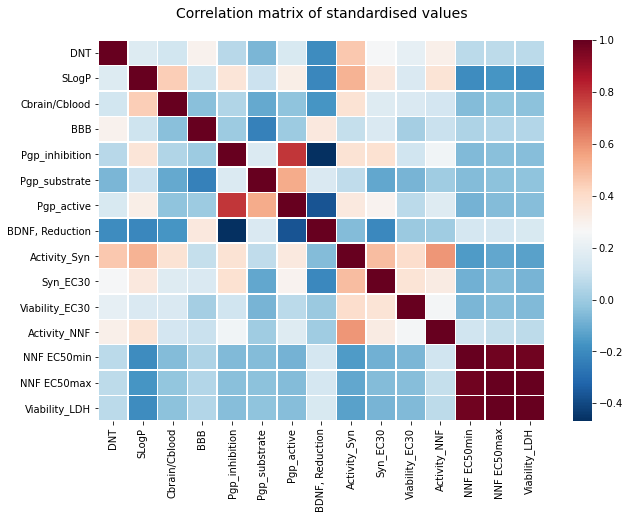

In [29]:
#Standardised
#This one used for manuscript
fig, ax = plt.subplots(figsize=(10,7))
pearsoncorr = data.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)
plt.title("Correlation matrix of standardised values\n", fontsize = 14);
#sns.set(font_scale=1)

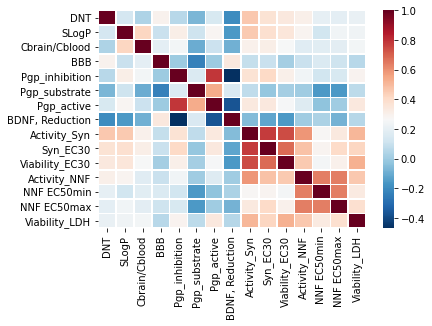

In [30]:
kendall = data.corr(method='kendall')
sns.heatmap(kendall, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5);

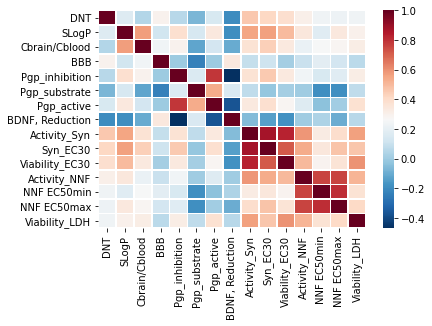

In [31]:
spearman = data.corr(method='spearman')
sns.heatmap(spearman, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5);

In [32]:
%load_ext watermark
%watermark -n -u -v -iv -w

seaborn   0.11.0
missingno 0.4.2
pandas    1.1.1
numpy     1.19.1
last updated: Tue May 11 2021 

CPython 3.8.5
IPython 7.18.1
watermark 2.0.2
